### import libraries

In [99]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### get data

In [100]:
csv_path = 'C:\\Users\\jlfen\\OneDrive\\Documentos\\JoaoKasten\\005_applied_projects\\project.censo-dataviz\\src\\data\\census_data.csv'
df = pd.read_csv(csv_path)

### 1. Análise de Crescimento Demográfico Brasileiro

> # Abstract
> Nesse estudo calculo a taxa de crescimento demográfico do Brasil e por Estado, além de identificar as cidades e estados com os maiores crescimentos, além da exibição gráfica dos valores calculados.

* Calcule a taxa de crescimento anual para o Brasil inteiro e para cada estado.
* Identifique as cidades com maior e menor crescimento em cada período censitário.
* Visualize o crescimento populacional em um gráfico de linhas ou barras.

In [101]:
pop_1991 = df[df['year'] == 1991]['population'].sum()
pop_2000 = df[df['year'] == 2000]['population'].sum()
pop_2010 = df[df['year'] == 2010]['population'].sum()
pop_2022 = df[df['year'] == 2022]['population'].sum()

### Taxa de Crescimento Demográfico Anual (_∆D_)

A fórmula geral para calcular a _∆D_ é:

\begin{equation}
∆D = \left( \frac{P_{\text{final}}}{P_{\text{inicial}}} \right)^{\frac{1}{n}} - 1
\end{equation}

Onde:
- _P_ final: população no final do período
- _P_ inicial: população no início do período
- _n_: número de anos entre o início e o final do período

### Taxa de Crescimento Demográfico Nacional (_∆DN_)

A taxa de crescimento demografico do Censo 2022 confirma a hipótese de que o Brasil está crescendo cada vez menos, com um média de 0,51% a.a. nos ultimos 30 anos.

In [102]:
def tca(p_initial, p_final, n):
    return (p_final/p_initial)**(1/n) - 1

# Calculando a TCA para os diferentes períodos
tca_1991_2000 = tca(pop_1991, pop_2000, 2000-1991)
tca_2000_2010 = tca(pop_2000, pop_2010, 2010-2000)
tca_2010_2022 = tca(pop_2010, pop_2022, 2022-2010)

# Calculando a TCA para o período completo
tca_1991_2022 = tca(pop_1991, pop_2022, 2022-1991)

# Mostrando as equações
print(f"TCA (1991-2000) = {tca_1991_2000*100:.2f}% ao ano")
print(f"TCA (2000-2010) = {tca_2000_2010*100:.2f}% ao ano")
print(f"TCA (2010-2022) = {tca_2010_2022*100:.2f}% ao ano")

# Calculando a TCA para o período completo
print(f"TCA (1991-2022) = {tca_1991_2022*100:.2f}% ao ano")

TCA (1991-2000) = 1.64% ao ano
TCA (2000-2010) = 1.17% ao ano
TCA (2010-2022) = 0.51% ao ano
TCA (1991-2022) = 1.05% ao ano


### Criar tabela com os dados calculados

Para criar a tabela da requisição para o SIDRA:
1. Atribuímos a _data_ como um dicionário, e então usamos a biblioteca _pandas_ para transformar _data_ em uma _DataFrame_ para inciarmos as análises.

In [103]:
data = {
    'year': [1991, 2000, 2010, 2022],
    'population': [pop_1991, pop_2000, pop_2010, pop_2022],
    'tca': ['', tca_1991_2000, tca_2000_2010, tca_2010_2022]
}

brazil_population_df = pd.DataFrame(data)
print(brazil_population_df)

   year   population       tca
0  1991  146186030.0          
1  2000  169252872.0  0.016413
2  2010  190073788.0  0.011669
3  2022  202066275.0  0.005112


In [104]:
import numpy as np
brazil_population_df['tca'] = brazil_population_df['tca'].replace('', np.nan).astype(float)

### O que dizem os dados?

* TCA (1991-2000) = 1.64% a.a.
* TCA (2000-2010) = 1.17% a.a.
* TCA (2010-2022) = 0.51% a.a.
* TCA (1991-2022) = 1.05% a.a.

A análise da Taxa de Crescimento Populacional ao longo dos anos revela uma clara tendência de desaceleração no Brasil. No período entre os censos de 1991 e 2000, a taxa estava em 1.64% ao ano. No entanto, ela caiu para 1.17% ao ano entre 2000 e 2010, e mais drasticamente para 0.51% ao ano entre 2010 e 2022. Esta última taxa é até mesmo menor do que a média geral do período entre 1991 e 2022, que é de 1.05% ao ano.

**Essa tendência sugere um envelhecimento da população brasileira. Não é um fenômeno isolado; muitos países ao redor do mundo estão experienciando uma desaceleração similar em seu crescimento populacional [1].**

Causas possíveis?

Com a melhora da infraestrutura, já havia inciado uma redução de filhos por mães, 



C:\Users\jlfen\AppData\Local\Temp\ipykernel_19756\1523846823.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


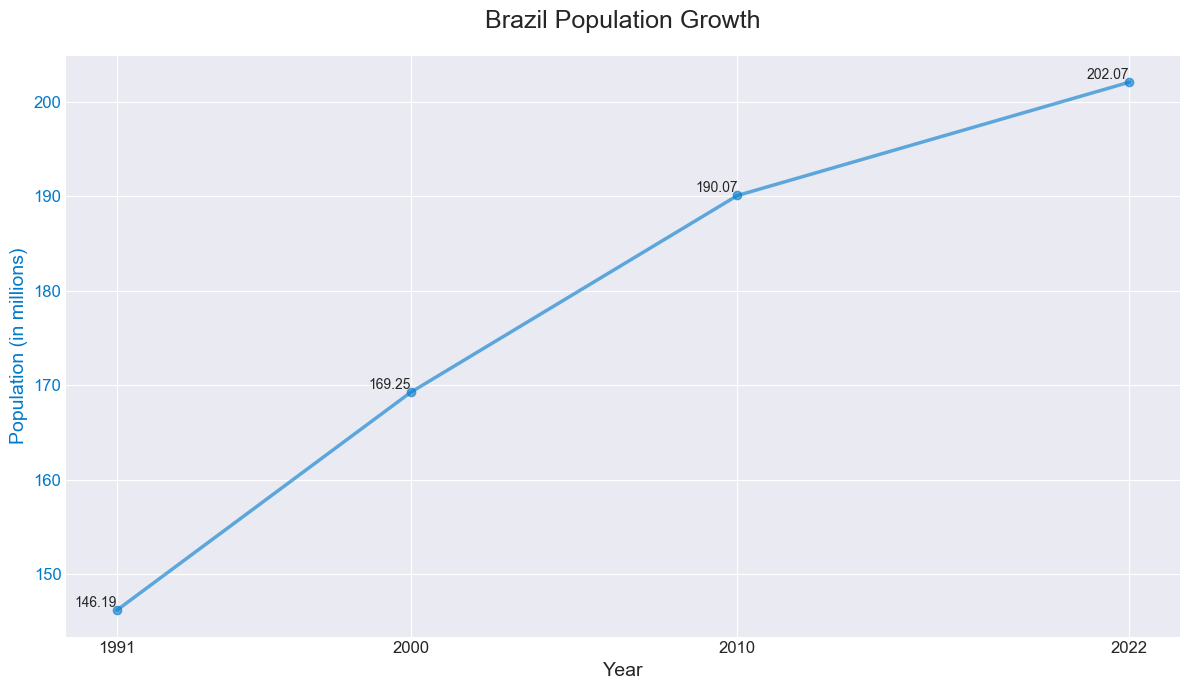

In [105]:
brazil_population_df['population_millions'] = brazil_population_df['population'] / 1e6

# Estilo do gráfico
plt.style.use('seaborn-darkgrid')

# Criação do gráfico
fig, ax1 = plt.subplots(figsize=(12,7))

# Gráfico principal para a população
line1, = ax1.plot('year', 'population_millions', data=brazil_population_df, marker='o', color='#007acc', label='Population', alpha=0.6, linewidth=2.5)
ax1.set_title('Brazil Population Growth', fontsize=18, pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Population (in millions)', color='#007acc', fontsize=14)
ax1.tick_params('y', colors='#007acc', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_xticks(brazil_population_df['year'].values)  # Define os anos dos censos no eixo X

# Rótulos nos pontos da linha
for i, txt in enumerate(brazil_population_df['population_millions']):
    ax1.text(brazil_population_df['year'].iloc[i], brazil_population_df['population_millions'].iloc[i], f'{txt:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# Pivot Table para as Populações dos Estados

In [106]:
city_population_pivot = df.pivot_table(index=['state', 'city'], columns='year', values='population').reset_index()
city_population_pivot.columns.name = None  # Remove o nome do índice das colunas
print(city_population_pivot)

     state          city     1991     2000     2010     2022
0       AC    Acrelândia      NaN   7929.0  12538.0  13978.0
1       AC  Assis Brasil   2914.0   3490.0   6023.0   8090.0
2       AC     Brasiléia  20125.0  16991.0  21383.0  25931.0
3       AC        Bujari      NaN   5826.0   8459.0  12917.0
4       AC      Capixaba      NaN   5206.0   8796.0  10370.0
...    ...           ...      ...      ...      ...      ...
5565    TO    Tocantínia   6342.0   5621.0   6730.0   7439.0
5566    TO      Tupirama      NaN   1179.0   1574.0   1909.0
5567    TO    Tupiratins      NaN   1364.0   2097.0   1865.0
5568    TO  Wanderlândia   9243.0  10259.0  10966.0  10506.0
5569    TO       Xambioá  11686.0  12124.0  11476.0  10503.0

[5570 rows x 6 columns]


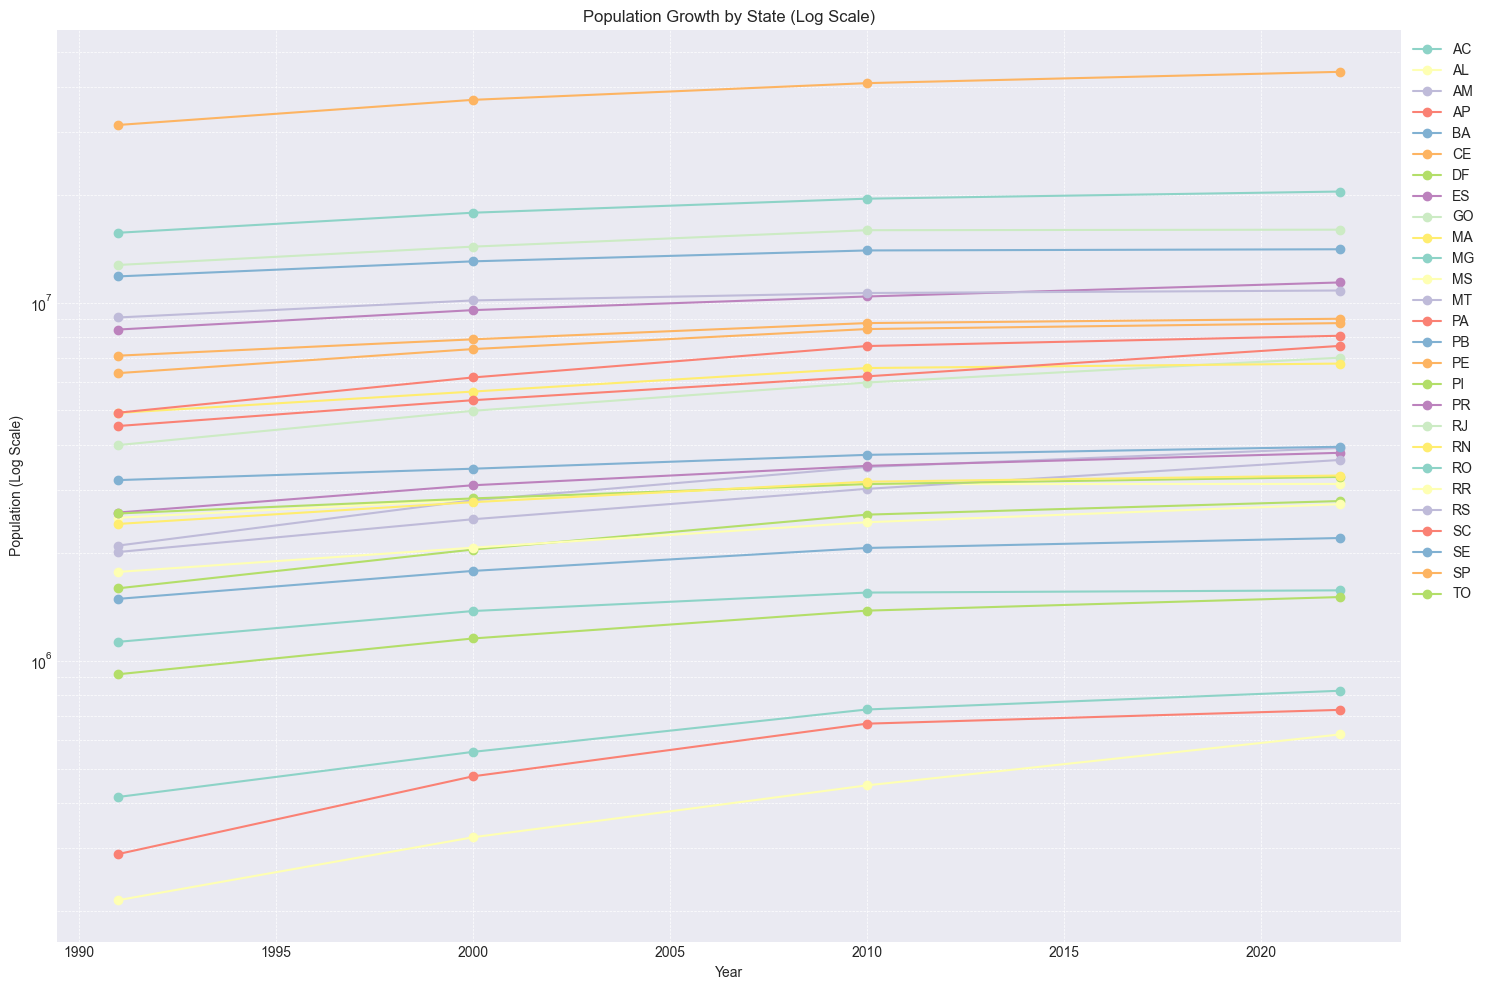

In [107]:
plt.figure(figsize=(15, 10))

# Iterando por cada estado e plotando no gráfico
for state in state_population_pivot.index:
    plt.plot(state_population_pivot.columns, state_population_pivot.loc[state], label=state, marker='o')

plt.yscale('log')  # Definindo a escala do eixo Y para logarítmica
plt.title('Population Growth by State (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Population (Log Scale)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [108]:
intervals = [(1991, 2000), (2000, 2010), (2010, 2022)]
tcas = {}

for start, end in intervals:
    n = end - start
    tca = ((state_population_pivot[end] / state_population_pivot[start]) ** (1/n)) - 1
    tcas[f"TCA {start}-{end}"] = tca

tca_df = pd.DataFrame(tcas)


In [109]:
print(tca_df)

       TCA 1991-2000  TCA 2000-2010  TCA 2010-2022
state                                             
AC          0.032731       0.027641       0.010087
AL          0.013059       0.010022       0.000080
AM          0.032895       0.021650       0.010243
AP          0.057110       0.034453       0.007417
BA          0.010812       0.007038       0.000628
CE          0.017326       0.012962       0.003185
DF          0.028065       0.022709       0.007309
ES          0.019663       0.012562       0.007009
GO          0.024794       0.018372       0.013394
MA          0.015342       0.015250       0.002385
MG          0.014430       0.009069       0.003830
MS          0.017450       0.016515       0.009712
MT          0.023677       0.019731       0.015600
PA          0.025478       0.020412       0.005531
PB          0.008166       0.008946       0.004353
PE          0.011737       0.010510       0.002315
PI          0.010806       0.009275       0.003839
PR          0.013963       0.00

# Mapa de Calor com as taxas de crescimento por estado nos ultimos anos

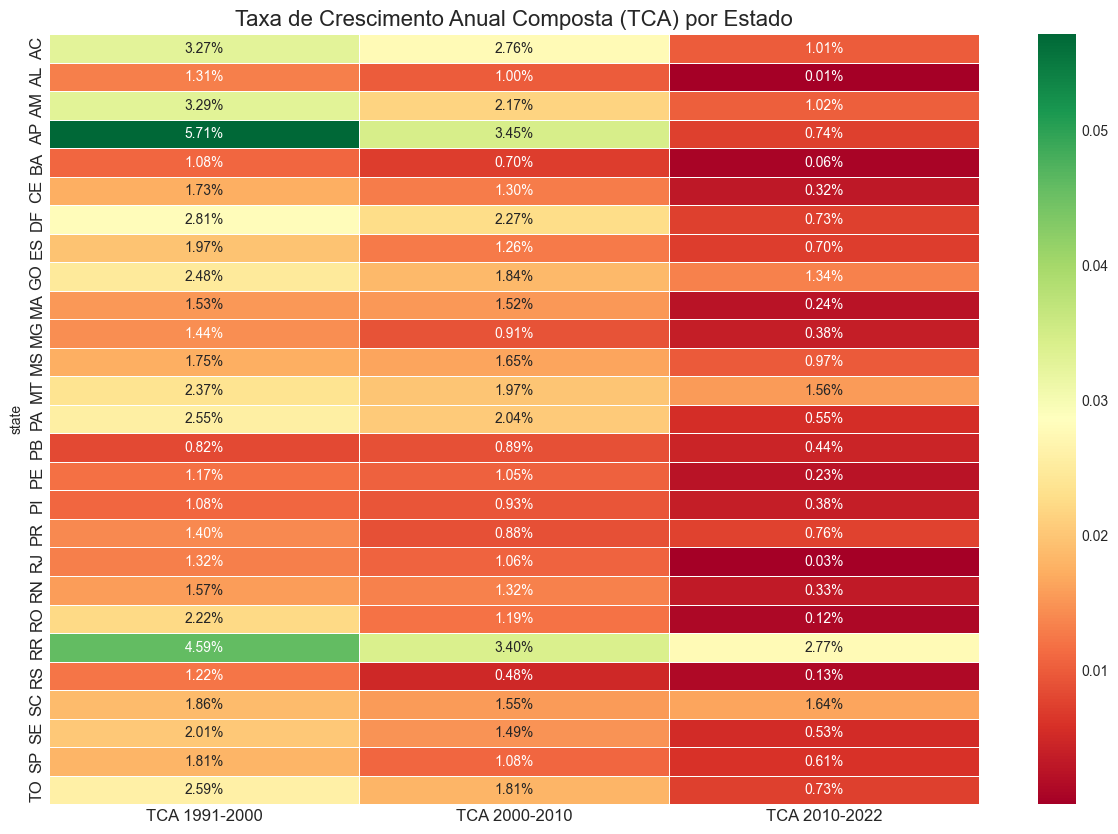

In [110]:
plt.figure(figsize=(15, 10))  # Aumentar o tamanho da figura

ax = sns.heatmap(tca_df, annot=True, cmap='RdYlGn', fmt=".2%", linewidths=.5)

plt.title("Taxa de Crescimento Anual Composta (TCA) por Estado", fontsize=16)

# Ajustar o tamanho da fonte dos rótulos
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()

### Reference
